In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [3]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='fivethirtyeight')

In [4]:
# SQl lentelė - InsuranceUSA7cols. Ar yra priklausoimybė tarp lyties, 
# kūno masės indekso (bmi), rūkymo, amžiaus, vaikų kiekio ir draudimo įmokos dydžio?

In [5]:
#sql užklausa per pandas sql_query
sql="""select * from InsuranceUSA7cols"""
df = pd.read_sql_query(sql, con=DB)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


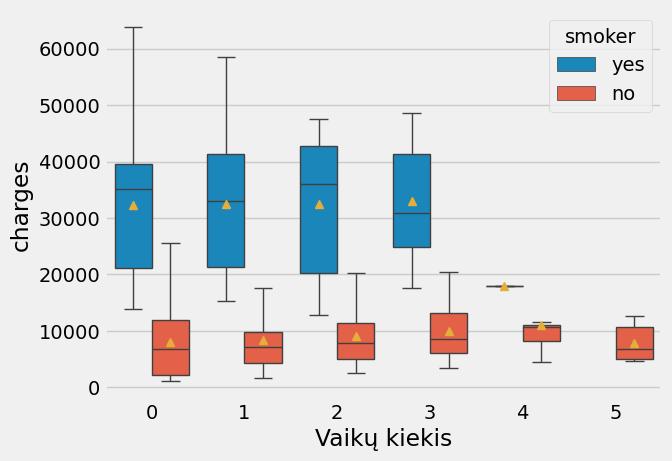

In [6]:
# seaborn galimybės

ax = sns.boxplot(data=df, x='children', y='charges', showmeans=True, showfliers=False, hue='smoker')
ax.set_xlabel('Vaikų kiekis')
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

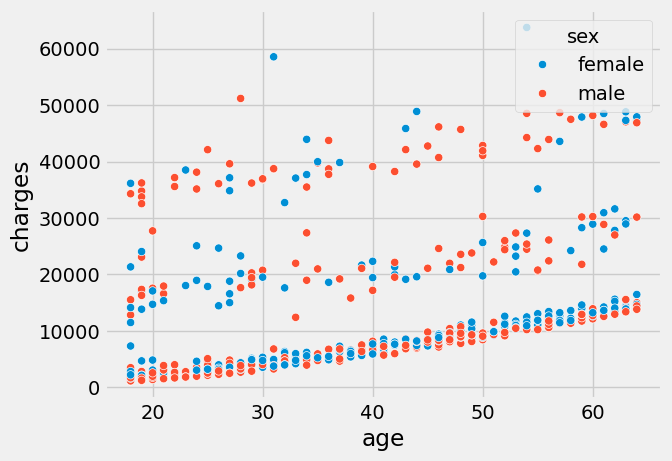

In [7]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex')

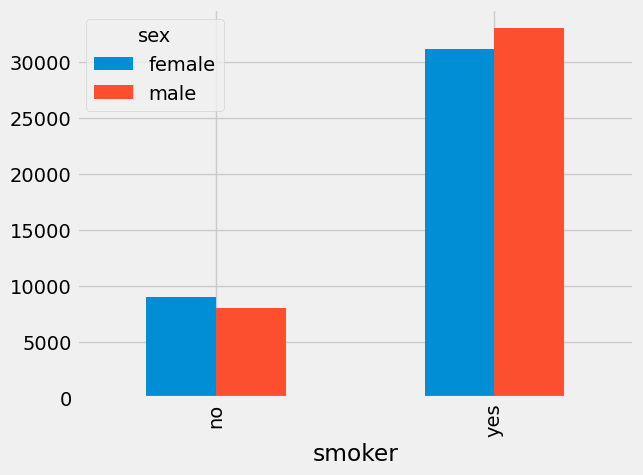

In [8]:
# pandas groypby, unstack() ir braižymas

df.groupby(['smoker', 'sex'])['charges'].mean().unstack().plot(kind='bar')
plt.show()

In [9]:
#  dus2018.csv:
#  parodykite vidutinio atlyginimo priklausomybę nuo 
# išsilavinimo ir amžiaus grupės (bar, vienas grafikas)

In [10]:
#sql užklausa per pandas sql_query
sql="""select issilavinimas, amzius, bdu_spalio from DUS2018N"""
df = pd.read_sql_query(sql, con=DB)
df.head()

,issilavinimas,amzius,bdu_spalio
0,G2,40-49,460
1,G2,50-59,1487
2,G2,40-49,1500
3,G2,50-59,1500
4,G2,40-49,400


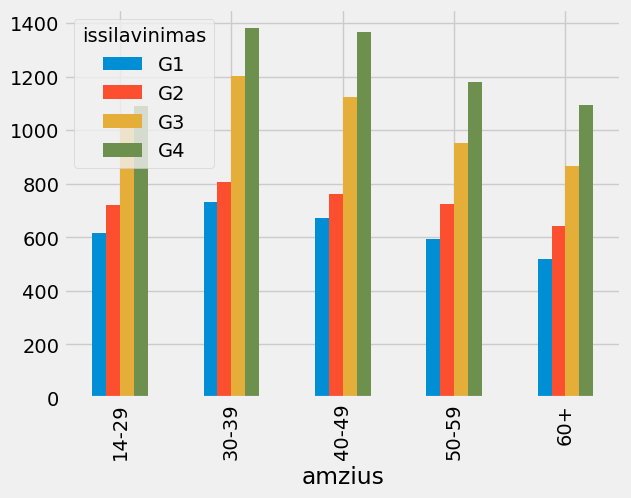

In [11]:
df.groupby(['amzius','issilavinimas'])['bdu_spalio'].mean().unstack().plot(kind='bar')
plt.show()

In [12]:
# 
SDB = sqlite3.connect('Testas.db') # jei neegsiztuoja - bus sukurfta nauja sqlite DB
Cs = SDB.cursor()

In [14]:
SDB = sqlite3.connect('../DATA/sqlData.db') # jei neegsiztuoja - bus sukurfta nauja sqlite DB
Cs = SDB.cursor()

In [17]:
#sql užklausa per pandas sql_query
sql="""select lytis, amzius, issilavinimas, bdu_spalio from DUS2018N"""
df = pd.read_sql_query(sql, con=SDB)
df.head()

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500
3,M,50-59,G2,1500
4,F,40-49,G2,400


In [19]:
sql = '''create table T1
(
    name text not null,
    surname text not null,
    age integer not null,
    salary real not null
)
'''
Cs.execute(sql)



In [24]:
sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28,  1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

In [25]:
SDB.commit() # commit() būtinas, jei norite įrašyti duoenis į DB

In [27]:
SDB = sqlite3.connect('Testas.db') # jei neegsiztuoja - bus sukurfta nauja sqlite DB
Cs = SDB.cursor()

sql = '''create table if not exists T1
(
    name text not null,
    surname text not null,
    age integer not null,
    salary real not null
)
'''
Cs.execute(sql)

sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28,  1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

Cs.execute(sql_template, ('T1','F1', 10, 1024))

SDB.commit() # commit() būtinas, jei norite įrašyti duoenis į DB

SDB.close()
